In [ ]:
#brown corpus
import nltk
from nltk.corpus import brown
print brown.categories()
print brown.sents(categories='news')

In [ ]:
cfd = nltk.ConditionalFreqDist( (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre))

genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor'] 
modals = ['can', 'could', 'may', 'might', 'must', 'will'] 
cfd.tabulate(conditions=genres, samples=modals)

In [ ]:
#loading own corpus
from nltk.corpus import PlaintextCorpusReader
corpus_root = path_file
wordLists = PlaintextCorpusReader(corpus_root, '.*')
wordLists.words(wordLists.fileids()[0])

In [ ]:
#bigrams
sent = ['In', 'the', 'beginning', 'God', 'created', 'the', 'heaven', 'and', 'the', 'earth', '.']
list(nltk.bigrams(sent))

In [ ]:
#proportion of non-stopping words
def content_fraction(text):
    stopwords = nltk.corpus.stopwords.words('english')
    content = [w for w in text if w.lower() not in stopwords]
    return 1.0 * len(content) / len(text)

content_fraction(nltk.corpus.reuters.words())

In [ ]:
#pronoucing dictionary
entries = nltk.corpus.cmudict.entries()
for entry in entries[39943:39951]:
    print entry

In [ ]:
#find words with similar pronounciation
for word, pron in entries:
    if len(pron) == 3:
        p1, p2, p3 = pron
        if p1 == 'P' and p3 == 'T':
            print word

In [ ]:
from nltk.corpus import toolbox
#toolbox.entries('rotokas.dic')

In [ ]:
#wordnet synonyms
from nltk.corpus import wordnet as wn
wn.synsets('motorcar')

In [ ]:
wn.synset('car.n.01').lemma_names()

In [ ]:
#look at concepts that're more specific
wn.synset('car.n.01').hyponyms()[:5]

In [ ]:
#look at concepts that're more general
wn.synset('car.n.01').hypernym_paths()[0]

In [ ]:
#the `include` relationship
wn.synset('tree.n.01').part_meronyms()

In [ ]:
#semantic similarity of two words
right = wn.synset('right_whale.n.01') 
orca = wn.synset('orca.n.01')
minke = wn.synset('minke_whale.n.01')

In [ ]:
#higher min_depth, more similar
right.lowest_common_hypernyms(minke)[0].min_depth()

# Processing Raw Text

In [ ]:
#tokenizing
from urllib import urlopen
url = "http://www.gutenberg.org/files/2554/2554.txt"
raw = urlopen(url).read()

tokens = nltk.word_tokenize(raw)
tokens[:10]

In [ ]:
#tokens to nltk text
text = nltk.Text(tokens)
text.vocab()

In [ ]:
#words commonly appear together
text.collocations()

In [ ]:
#sentence segmentation
sent_tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
text = nltk.corpus.gutenberg.raw('some_file')
sens = sent_tokenizer(text)

### POS Tagging

In [ ]:
text = nltk.word_tokenize("They refuse to permit us to obtain the refuse permit")

In [ ]:
nltk.pos_tag(text)

> The text.similar() method takes a word w, finds all contexts w1w w2, then finds all words w' that appear in the same context, i.e. w1w'w2.

In [ ]:
text = nltk.Text(word.lower() for word in nltk.corpus.brown.words())

In [ ]:
text.similar("woman")

In [ ]:
#tagged corpus
nltk.corpus.brown.tagged_words()

In [ ]:
from nltk.corpus import brown
brown_news_tagged = brown.tagged_words(categories="news")

In [ ]:
#what POS happen before a noun
word_tag_pairs = nltk.bigrams(brown_news_tagged)
list(nltk.FreqDist(a[1] for (a, b) in word_tag_pairs if b[1].startswith('N')))

## Automatic tagging

In [ ]:
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories="news")

In [ ]:
#regular expression tagger
patterns = [
     (r'.*ing$', 'VBG'),
    (r'.*ed$', 'VBD'),
    (r'.*es$', 'VBZ'),
    (r'.*ould$', 'MD'),
    (r'.*\'s$', 'NN$'),
    (r'.*s$', 'NNS'),
    (r'^-?[0-9]+(.[0-9]+)?$', 'CD'),
    (r'.*', 'NN') ]

In [ ]:
#first one that matches is applied
regex_tagger = nltk.RegexpTagger(patterns)
regex_tagger.tag(brown.sents(categories='news')[3])

In [ ]:
#look up tagger
#use the most frequent words and their most frequent tag
fd = nltk.FreqDist(brown.words(categories='news'))
cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
most_freq_words = fd.keys()[:100]
likely_tags = dict((word, cfd[word].max()) for word in most_freq_words)
baseline_tagger = nltk.UnigramTagger(model=likely_tags)

sent = brown.sents(categories='news')[3]
baseline_tagger.tag(sent)

In [ ]:
#using backoff
baseline_tagger = nltk.UnigramTagger(model=likely_tags,
                                         backoff=nltk.DefaultTagger('NN'))

In [ ]:
baseline_tagger.evaluate(brown.tagged_sents(categories='news'))

In [ ]:
#uni-grame tagger
#same as look up
unigram_tagger = nltk.UnigramTagger(brown_tagged_sents)
unigram_tagger.evaluate(brown_tagged_sents)

In [ ]:
#n-gram tagger
bigram_tagger = nltk.BigramTagger(brown_tagged_sents)
bigram_tagger.evaluate(brown_tagged_sents)

> N-gram taggers should not consider context that crosses a sentence boundary. Accordingly, NLTK taggers are designed to work with lists of sentences, where each sentence is a list of words. At the start of a sentence, tn-1 and preceding tags are set to None

## Combine Taggers   

1. Try tagging the token with the bigram tagger.
2. If the bigram tagger is unable to find a tag for the token, try the unigram tagger. 
3. If the unigram tagger is also unable to find a tag, use a default tagger.


In [ ]:
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(brown_tagged_sents, backoff=t0)
#cut off specify the pattern has to appear over 2 times to be used
t2 = nltk.BigramTagger(brown_tagged_sents, cutoff=2, backoff=t1)

t2.evaluate(brown_tagged_sents)

### Tagging unknow words  
> replacing unknownn words with UNK, so that the n-gram can learn the pattern

### Brill Tagging
> The general idea is very simple: guess the tag of each word, then go back and fix the mistakes. In this way, a Brill tagger successively transforms a bad tagging of a text into a better one. As with n-gram tagging, this is a supervised learning method, since we need an- notated training data to figure out whether the tagger’s guess is a mistake or not. How- ever, unlike n-gram tagging, it does not count observations but compiles a list of trans- formational correction rules.

#### Let’s look at an example in- volving the following sentence:
__The President said he will ask Congress to increase grants to states for voca- tional rehabilitation.__
> We will examine the operation of two rules: (a) replace NN with VB when the previous word is TO; (b) replace TO with IN when the next tag is NNS. Table 5-6 illustrates this process, first tagging with the unigram tagger, then applying the rules to fix the errors.

![Img](./image/Brill.png)

In [ ]:
import nltk.tag.brill as brill

"Source code"

# Classifying Text

In [2]:
import pandas as pd
import numpy as np

#sentence segmentation
sents = nltk.corpus.treebank_raw.sents()

boundary = np.array([len(x) for x in sents])-1

boundary = np.cumsum(boundary)

sents = [x for y in sents for x in y]

NameError: name 'nltk' is not defined

In [ ]:
#build up feature set
features = []
for i in range(1, len(sents)-1):
    if sents[i] not in '.?!':
        continue
    next_word_cap = sents[i+1][0].isupper()
    prevword = sents[i-1].lower()
    prev_word_one_char = len(sents[i-1]) == 1
    is_bountry = i in sents
    features.append((next_word_cap, prevword, prev_word_one_char, is_bountry))

#then run some classification like naive bayes

# Extracting information

![information retrieval](./image/info_retrieval.png)

In [3]:
import nltk, re, pprint

def ie_process(document):
    sentences = nltk.sent_tokenize(document)
    sentences = [nltk.word_tokenize(sent) for sent in sentences]
    sentences = [nltk.pos_tag(sent) for sent in sentences]
    

## Noun Phrase Chunking

> In this case, we will define a simple grammar with a single regular expression rule . This rule says that an NP chunk should be formed whenever the chunker finds an optional determiner (DT) followed by any number of adjectives (JJ) and then a noun (NN). Using this grammar, we create a chunk parser , and test it on our example sentence . The result is a tree, which we can either print , or display graphically .

In [4]:
sentence = [("the", "DT"), ("little", "JJ"), ("yellow", "JJ"),("dog", "NN"), ("barked", "VBD"), ("at", "IN"), ("the", "DT"), ("cat", "NN")]
grammar  = "NP: {<DT>?<JJ>*<NN>}"
cp = nltk.RegexpParser(grammar)
result  = cp.parse(sentence)
print type(result)
print result

<class 'nltk.tree.Tree'>
(S
  (NP the/DT little/JJ yellow/JJ dog/NN)
  barked/VBD
  at/IN
  (NP the/DT cat/NN))


In [7]:
grammar = r"""
NP: {<DT|PP\$>?<JJ>*<NN>} # chunk determiner/possessive, adjectives and nouns
{<NNP>+} # chunk sequences of proper nouns """
cp = nltk.RegexpParser(grammar)
sentence = [("Rapunzel", "NNP"), ("let", "VBD"), ("down", "RP"),
("her", "PP$"), ("long", "JJ"), ("golden", "JJ"), ("hair", "NN")]

#### IOB tags
> In this scheme, each token is tagged with one of three special chunk tags, I (inside), O (outside), or B (begin). A token is tagged as B if it marks the beginning of a chunk. Subsequent tokens within the chunk are tagged I. All other tokens are tagged O.

![iob](./image/IOB.png)

### Developing and Evaluating Chunkers

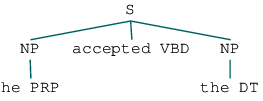

In [22]:
#reading IOB format and converting to nltk tree
text = '''
he PRP B-NP
accepted VBD B-VP
the DT B-NP
'''

nltk.chunk.conllstr2tree(text, chunk_types=['NP'])
#if come across Lookup Error; Install ghostdriver with:
#brew install ghostdriver

In [14]:
#CoNLL-2000 chunking corpus
from nltk.corpus import conll2000
print conll2000.chunked_sents('train.txt')[99]

(S
  (PP Over/IN)
  (NP a/DT cup/NN)
  (PP of/IN)
  (NP coffee/NN)
  ,/,
  (NP Mr./NNP Stone/NNP)
  (VP told/VBD)
  (NP his/PRP$ story/NN)
  ./.)


In [24]:
#baseline: no chunks
cp = nltk.RegexpParser("")
test_sents = conll2000.chunked_sents('test.txt', chunk_types=['NP'])
len(test_sents)

2012

In [26]:
print cp.evaluate(test_sents)

ChunkParse score:
    IOB Accuracy:  43.4%
    Precision:      0.0%
    Recall:         0.0%
    F-Measure:      0.0%


In [28]:
grammar = r"NP: {<[CDJNP].*>+}"
cp = nltk.RegexpParser(grammar)
print cp.evaluate(test_sents)

ChunkParse score:
    IOB Accuracy:  87.7%
    Precision:     70.6%
    Recall:        67.8%
    F-Measure:     69.2%


In [40]:
#using unigram tagger to build chunker
#from POS-tag to chunk
class UnigramChunker(nltk.ChunkParserI):
    def __init__(self, train_sents):
        train_data = [[(t,c) for w,t,c in nltk.chunk.tree2conlltags(sent)] for sent in train_sents]
        self.tagger = nltk.UnigramTagger(train_data)
        
    def parse(self, sentence):
        pos_tags = [pos for (word, pos) in sentence]
        tagged_pos_tags = self.tagger.tag(pos_tags)
        chunktags = [chunktag for (pos, chunktag) in tagged_pos_tags]
        conlltags = [(word, pos, chunktag) for ((word,pos),chunktag)
                in zip(sentence, chunktags)]
        #note all the tags is in list of tags, so use colltags2tree not collstr2tree
        return nltk.chunk.conlltags2tree(conlltags)

In [41]:
test_sents = conll2000.chunked_sents('test.txt', chunk_types=['NP'])
train_sents = conll2000.chunked_sents('train.txt', chunk_types=['NP'])
unigram_chunker = UnigramChunker(train_sents)
print unigram_chunker.evaluate(test_sents)

ChunkParse score:
    IOB Accuracy:  92.9%
    Precision:     79.9%
    Recall:        86.8%
    F-Measure:     83.2%


In [42]:
class BigramChunker(nltk.ChunkParserI):
    def __init__(self, train_sents):
        train_data = [[(t,c) for w,t,c in nltk.chunk.tree2conlltags(sent)] for sent in train_sents]
        self.tagger = nltk.BigramTagger(train_data)
        
    def parse(self, sentence):
        pos_tags = [pos for (word, pos) in sentence]
        tagged_pos_tags = self.tagger.tag(pos_tags)
        chunktags = [chunktag for (pos, chunktag) in tagged_pos_tags]
        conlltags = [(word, pos, chunktag) for ((word,pos),chunktag)
                in zip(sentence, chunktags)]
        #note all the tags is in list of tags, so use colltags2tree not collstr2tree
        return nltk.chunk.conlltags2tree(conlltags)

In [44]:
test_sents = conll2000.chunked_sents('test.txt', chunk_types=['NP'])
train_sents = conll2000.chunked_sents('train.txt', chunk_types=['NP'])
bigram_chunker = BigramChunker(train_sents)
print bigram_chunker.evaluate(test_sents)

ChunkParse score:
    IOB Accuracy:  93.3%
    Precision:     82.3%
    Recall:        86.8%
    F-Measure:     84.5%


### Training Classifier-Based Chunkers
a. Joey/NN sold/VBD the/DT farmer/NN rice/NN ./.
b. Nick/NN broke/VBD my/DT computer/NN monitor/NN ./.

> These two sentences have the same part-of-speech tags, yet they are chunked differ- ently. In the first sentence, the farmer and rice are separate chunks, while the corre- sponding material in the second sentence, the computer monitor, is a single chunk. Clearly, we need to make use of information about the content of the words, in addition to just their part-of-speech tags, if we wish to maximize chunking performance.

In [45]:
class ConsecutiveNpChunkTagger(nltk.TaggerI):
    def __init__(self, train_sents):
        train_set = []
        for tagged_sent in train_sents:
            untagged_sent = nltk.tag.untag(tagged_sent)
            history = []
            for i, (word, tag) in enumerate(tagged_sent):
                featureset = npchunk_features(untagged_sent, i, history)
                train_set.append((featureset, tag))
                history.append(tag)
            self.classifier = nltk.MaxentClassifier.train(train_set, algorithm='megam', trace=0)
            
    def tag(self, sentence):
        history = []
        for i, word in enumerate(sentence):
            featureset = npchunk_features(sentence, i, history)
            tag = self.classifier.classifier(featureset)
            history.append(tag)
        return zip(sentence, history)
    

class ConsecutiveNpChunk(nltk.ChunkParserI):
    def __init__(self, train_sents):
        tagged_sents = 